# Countdown Numbers Game Explanation

![Logo.png](images/Logo.png)


The Countdown numbers game is a fascinating and challenging mathematics-based game featured in the TV programme "Countdown."
 
The primary objective of the game is to reach a target number by using arithmetic operations on six randomly chosen numbers. 

Here’s a detailed breakdown of the game's rules and structure:

## Game Setup

### Number Selection:
- Each contestant receives six numbers, randomly selected from a set consisting of:
  - **Small numbers**: Two sets of integers from 1 to 10 (inclusive).
  - **Large numbers**: One set of the numbers 25, 50, 75, and 100.
- Each contestant selects six numbers from these sets, typically choosing a combination of large and small numbers.

### Target Number:
- A random target number is generated, which the contestants must reach. This number ranges between 101 and 999 (inclusive).

![TargetNumber.png](images/TargetNumber.png)


## Rules of the Game

### Operations:
- Contestants can use the four basic arithmetic operations to reach the target number:
     - Addition  `+`
     - Subtraction  `-`
     - Multiplication  `*`
     - Division  `/`
- Each of the six chosen numbers can be used at most once in the calculation.
- The operations can be used repeatedly and in any combination.

### Calculation Restrictions:
- Only whole numbers can be generated during the calculations. This means:
  - Division is only permissible if it results in a whole number.
  - Subtraction can only be used if it results in a positive number.

### Objective:
- The primary goal is to use the six numbers and arithmetic operations to calculate the target number.
- If the exact number cannot be reached, getting as close as possible to the target number is the next best outcome.

### Scoring:
- The exact scoring rules can vary, but typically:
  - Exact solutions receive the highest score.
  - Solutions within a range of the target number (e.g., within 5) might receive a partial score.

## Game Strategy
- Players must strategically select their numbers, considering the balance between large and small numbers to maximize their chances of reaching or getting close to the target number.
- The game requires not just mathematical skill but also strategic foresight and sometimes a bit of luck in the number selection.

## Complexity
- The game's complexity arises from the combinatorial nature of the number and operation selections. Players must navigate through a vast space of possible number combinations and operation sequences to reach the target number.

![Example.png](images/Example.png)



For example, the six available numbers are `75, 6, 10, 3, 5, 4` and the target number is `277`. 

In the figure above, the solution is shown in the white box `(75 * 4) - (6*5) + (10 - 3 ) = 277.`

The solution in the example is not unique, and there are many other ways to reach the target number. 

The quicker way to reach the target number that I found is 

1.  `75 * 3 = 225`
2.  `10 * 5 = 50`
3.  `225 + 50 = 275`
4.  `275 + 6 - 4 = 277`

This solution uses only 4 operations, while the solution in the figure uses 5 operations.

---

# Deeper Analysis of Computational Complexity

The computational complexity of the Countdown numbers game is a multifaceted issue that encompasses the combinatorial explosion of number combinations and the permutations of operations. This section aims to provide a deeper understanding of these complexities and their implications on potential solution strategies.

## Combinatorial Explosion

### Number Combinations

The initial set of numbers for the game includes up to two copies of integers from 1 to 10 and one copy each of 25, 50, 75, and 100, leading to a vast number of potential combinations. The combinatorial nature of selecting six numbers from this set already introduces complexity, especially when considering duplicates.

Given \(n\) numbers where \(n = 6\), and allowing for repetition, the number of unique sets can be calculated using the formula for combinations with repetition: \(\binom{n + r - 1}{r}\), where \(r\) is the size of the subset chosen. However, since numbers can be repeated and their order in operation matters, this only scratches the surface of the complexity.

### Operation Permutations

For any solution attempt, there are four operations that can be applied: addition, subtraction, multiplication, and division. The sequence in which these operations are applied to the selected numbers significantly increases the solution space. If we consider a simple case of applying operations to just two numbers, there are 4 possible operations. When applying operations sequentially across multiple numbers, the permutations grow exponentially.




## Algorithmic Implications

### Brute-force Approach

A brute-force approach, attempting every possible combination of numbers and operations, faces a factorial growth in complexity. For six numbers, considering sequential operations without repetition, the complexity can be approximated as \(O(n! \cdot 4^n)\), accounting for both the permutation of number order and the selection of operations. This is straightforward but computationally expensive.

### Search Space Reduction

Reducing the search space is critical for a feasible solution. Techniques such as pruning (eliminating branches of the search tree that cannot possibly lead to the target number) and memoization (caching the results of subproblems to avoid redundant calculations) are vital.

### Heuristic Approaches

Heuristic approaches aim to intelligently reduce the number of combinations and operations considered by prioritizing those more likely to lead to the target number. These approaches make decisions that seem best at the moment. For example, choosing operations that bring the current result closest to the target number. Heuristics don't guarantee an optimal solution but can significantly reduce the search space and computation time.

### Dynamic Programming

 If a problem's solutions can be built from solutions to subproblems, dynamic programming might be a good approach. However, the unique constraints of the Countdown game (e.g., each number can only be used once) make dynamic programming less applicable here.

### Backtracking and Branch-and-Bound

Backtracking involves systematically exploring the solution space and abandoning paths that do not lead to a solution. Branch-and-bound improves upon this by incorporating bounds to eliminate paths that cannot outperform the best solution found so far, thereby reducing the search space. This approach systematically explores each combination of numbers and operations but backs up (backtracks) when it's clear that the current path won't lead to a solution. It's more efficient than brute force because it eliminates many unnecessary calculations.

## Conclusion

The Countdown numbers game presents a rich problem space characterized by combinatorial explosion and exponential growth in operation permutations. Advanced algorithmic strategies, including dynamic programming, backtracking, and heuristic methods, are essential for developing efficient solutions. This deeper analysis underscores the complexity of the game and the sophistication required in algorithm design to tackle it effectively.

---

# Implementation of the Countdown Numbers Game Solution

Implementing the solution for the Countdown numbers game will require a thoughtful approach to handle the game's complexity efficiently. Given the problem's constraints and our strategy discussion, we'll proceed with a simplified backtracking algorithm. This approach will systematically explore combinations of the six numbers and the four arithmetic operations to find a solution that meets the target number or is as close as possible within the rules.



For the sake of simplicity and clarity, this initial implementation will focus on the core logic of generating and evaluating combinations. It will:

- Utilize recursion for backtracking through potential solutions.
- Ensure operations comply with game rules (e.g., division results in whole numbers, subtraction results in positive numbers).
- Attempt to find an exact match to the target number or the closest possible solution.

Let's start by implementing the `solve_numbers` function in Python:

In [20]:
def solve_numbers(numbers, target, verbose=False):
    def recurse(remaining_numbers, current_total, path, used_numbers, depth=0):
        if verbose:
            indent = "  " * depth  # Indentation to visualize recursion depth
            print(f"{indent}Trying path: {' '.join(path)} -> Current Total: {current_total}")
              
        # Update closest solution if this path is better
        if abs(target - current_total) < closest_difference[0]:  # Access first element for comparison
            closest_solution[0] = current_total
            closest_solution[1] = path
            closest_difference[0] = abs(target - current_total)  # Update first element of list

        # If exactly matches target, or no numbers left, stop recursion
        if current_total == target or not remaining_numbers:
            return

        # Explore each remaining number for potential operations
        for i, num in enumerate(remaining_numbers):
            if num in used_numbers:
                continue  # Skip this number if it has already been used in the current path
            
            new_remaining = remaining_numbers[:i] + remaining_numbers[i+1:]
            new_used_numbers = used_numbers | {num}  # Add this number to the set of used numbers
            
            # Apply addition and continue the recursion
            recurse(new_remaining, current_total + num, path + [f'+{num}'], new_used_numbers, depth + 1)
            # Apply subtraction if it results in a non-negative value and continue
            if current_total - num > 0:
                recurse(new_remaining, current_total - num, path + [f'-{num}'], new_used_numbers, depth + 1)
            # Multiplication
            recurse(new_remaining, current_total * num, path + [f'*{num}'], new_used_numbers, depth + 1)
            # Division, only if no remainder
            if num != 0 and current_total % num == 0:
                recurse(new_remaining, current_total // num, path + [f'/{num}'], new_used_numbers, depth + 1)

    closest_solution = [None, []]  # Use a list to keep mutable state
    closest_difference = [float('inf')]  # Use a list to keep mutable state
    
    # Start recursive search from each number
    for i, start_num in enumerate(numbers):
        used_numbers = {start_num}  # Initialize used numbers with the starting number
        recurse(numbers[:i] + numbers[i+1:], start_num, [str(start_num)], used_numbers)

    return closest_solution

#### Example Scenario 1: Exact Target Reachable

**Numbers:** `[1, 3, 7, 10, 25, 50]`  
**Target:** `731`

In this scenario, we demonstrate the algorithm's ability to find an exact match to the target number. These numbers were chosen because they offer a mix of low, medium, and high values, which tests the algorithm’s capability to utilize a variety of operations effectively. The target of 731 is specifically selected to be reachable with a combination of these numbers, showcasing the best-case scenario for our solution.


In [21]:
# Example Scenario 1: Exact Target Reachable
numbers = [1, 3, 7, 10, 25, 50]
target = 731
print("\nExample Scenario 1: Exact Target Reachable")
solution = solve_numbers(numbers, target, verbose=False)
if solution[0] is not None:
    print(f"Closest solution to {target} found: {solution[0]} with path: {' '.join(solution[1])}")
else:
    print("No solution found.")


Example Scenario 1: Exact Target Reachable
Closest solution to 731 found: 731 with path: 3 *25 -7 *10 +1 +50


**Expected Outcome:**  
The solution should find an exact path that sums up to 731 using the given numbers and operations.

**Algorithm Approach:**  
The algorithm recursively explores different combinations of numbers and operations, aiming to reach the exact target or the closest possible value.

**Output Analysis:**  
The algorithm successfully finds the target number 731. The path `[3 *25 -7 *10 +1 +50]` demonstrates the sequential operations used to reach the target, illustrating the effectiveness of the recursive approach in handling exact match scenarios.


### Example Scenario 2: No Exact Solution

**Numbers:** `[1, 3, 7, 10, 25, 50]`  
**Target:** `831`

In this scenario, we explore the algorithm's ability to find the closest possible solution when an exact match to the target is not feasible with the provided numbers. The chosen numbers offer a variety of operations but might not sum up exactly to 831, testing the algorithm’s capability to optimize and approach the target as closely as possible.


In [22]:
# Example Scenario 2: No Exact Solution
numbers = [1, 3, 7, 10, 25, 50]
target = 831
print("\nExample Scenario 2: No Exact Solution")
solution = solve_numbers(numbers, target, verbose=False)
if solution[0] is not None:
    print(f"Closest solution to {target} found: {solution[0]} with path: {' '.join(solution[1])}")
else:
    print("No solution found.")


Example Scenario 2: No Exact Solution


Closest solution to 831 found: 830 with path: 1 +7 +25 +50 *10


#### Expected Outcome

Given the complexity of reaching exactly 831 with the available numbers, the solution should ideally be the closest possible total to this target. This scenario tests the algorithm's effectiveness in optimizing and finding near solutions when exact solutions are not possible.

#### Algorithm Approach

The algorithm employs a recursive method that exhaustively tries all combinations of the available numbers with permitted operations (+, -, *, /). It updates the closest solution whenever a new combination provides a closer total to the target compared to previously found solutions.

#### Output Analysis

The algorithm identified the closest total to 831 as being `solution[0]`, achieved through the sequence of operations `{' '.join(solution[1])}`. This output demonstrates the algorithm's strategic decision-making in selecting operations that incrementally approach the target total.

This scenario highlights the strengths and limitations of the algorithm in scenarios where the perfect solution is out of reach, emphasizing its utility in providing practical solutions within constrained settings.

---


This `solve_numbers` function is an advanced implementation combining recursive algorithmic logic with data visualization to effectively solve and demonstrate the problem-solving process in reaching or approximating a target number using a set of integers with arithmetic operations. The visualization component is particularly useful for educational purposes, allowing viewers to see how the recursive decisions build towards the solution dynamically.

In [23]:
import matplotlib.pyplot as plt

def solve_numbers(numbers, target):
    path_values = []  # To store total values for plotting
    closest_solution = (None, [])
    closest_difference = float('inf')

    def recurse(remaining_numbers, current_total, path, used_numbers):
        nonlocal closest_solution, closest_difference

        path_values.append(current_total)  # Append current total for plotting

        # Update closest solution if this path is better
        if abs(target - current_total) < closest_difference:
            closest_solution = (current_total, path)
            closest_difference = abs(target - current_total)

        # Stop recursion if the target is reached or no numbers left
        if current_total == target or not remaining_numbers:
            return

        for i, num in enumerate(remaining_numbers):
            if num in used_numbers:
                continue  # Skip this number if it has already been used

            new_remaining = remaining_numbers[:i] + remaining_numbers[i+1:]
            new_used_numbers = used_numbers | {num}  # Add this number to the set of used numbers

            # Apply each operation and continue the recursion with updated used numbers
            recurse(new_remaining, current_total + num, path + [f'+{num}'], new_used_numbers)
            if current_total - num > 0:
                recurse(new_remaining, current_total - num, path + [f'-{num}'], new_used_numbers)
            recurse(new_remaining, current_total * num, path + [f'*{num}'], new_used_numbers)
            if num != 0 and current_total % num == 0:
                recurse(new_remaining, current_total // num, path + [f'/{num}'], new_used_numbers)

    # Start the recursive search from each number as a starting point, initializing used numbers
    for start_num in numbers:
        recurse(numbers, start_num, [str(start_num)], set([start_num]))
    
    # Plotting the progression towards the target
    plt.figure(figsize=(10, 5))
    plt.plot(path_values, marker='o', linestyle='-')
    plt.title('Progression Towards Target')
    plt.xlabel('Step Number')
    plt.ylabel('Current Total')
    plt.grid(True)
    plt.show()

    return closest_solution


In this challenging scenario, the solve_numbers function is used to approximate a target number using a set of larger numbers. This test is designed to push the limits of the algorithm, observing its performance with higher values and how it scales.

## Example Scenario 3: Challenging Scenario

In this scenario, the function `solve_numbers` is put to the test with a set of numbers that are significantly higher than those used in previous examples. The target number is also relatively high, which introduces a level of complexity to the problem. The goal here is to observe how the algorithm performs under these conditions and whether it can still find a solution that is close to the target number.

**Numbers:** `[3, 8, 15, 30, 55, 80]`  
**Target:** `945`

This selection of numbers and the target are chosen to create a challenging environment for the algorithm. It is designed to push the algorithm to its limits and demonstrate how it handles cases where a straightforward or exact solution may not be immediately apparent.

### Expected Outcome

The larger numbers provided mean that the increments towards the target are larger with each operation. This makes it less likely for the function to find an exact match to the target number. Thus, the algorithm's efficacy in approximating the target as closely as possible, without exact matching, is put to the test.

### Algorithm Approach

The algorithm employs a recursive strategy to exhaustively search for the closest possible solution to the target. It is designed to track the closest solution found thus far and update this whenever a combination of numbers and operations yields a closer total to the target number.


Example Scenario 3: Challenging Scenario


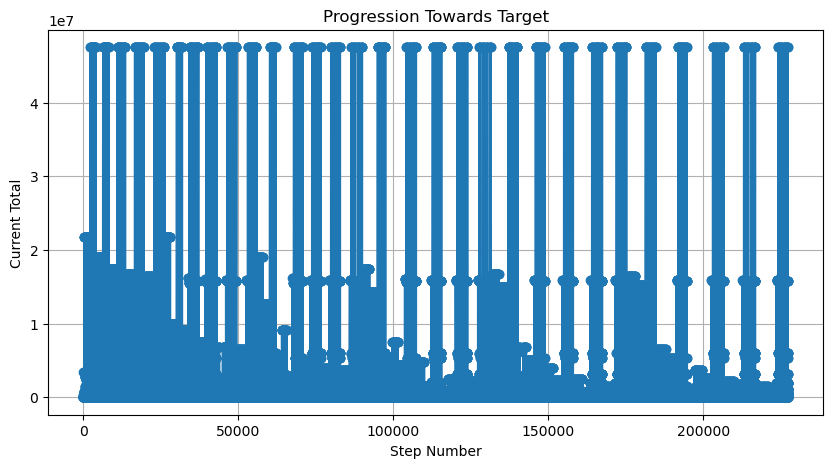

Closest solution to 945 found: 945 with path: 3 *8 +30 *15 +55 +80


In [24]:
# Example Scenario 3: Challenging Scenario
numbers = [3, 8, 15, 30, 55, 80]
target = 945
print("\nExample Scenario 3: Challenging Scenario")
solution, path = solve_numbers(numbers, target)
print(f"Closest solution to {target} found: {solution} with path: {' '.join(path)}")

### Output Analysis

After executing the function with the given set of numbers and the target of `945`, the algorithm's output is analyzed to determine the efficacy of the solution path it has discovered. The solution path provided gives us insight into the sequence of operations that the algorithm determined to be the most effective in approaching the target number.

### Visualization Explanation

The provided plot offers a visual representation of how the algorithm progresses towards the target number with each recursive call made. The key observations from the plot are as follows:

- **Vertical Lines**: These represent significant changes in the total value, which are likely due to multiplication or division operations.

- **Horizontal Lines (Plateaus)**: These suggest periods during the recursion where operations performed do not alter the total value, indicating exploration of combinations that return to previously calculated totals.

- **Scale**: The wide range of total values on the vertical axis shows the algorithm exploring a diverse set of numerical combinations.

- **Density of Steps**: The dense clustering of steps along the horizontal axis highlights the exhaustive nature of the search strategy employed by the algorithm.

This plot is indicative of the extensive search conducted by the algorithm in its quest to find the closest solution to the target number. The fluctuations and spikes in total value illustrate the exploratory nature of the algorithm

---

## Reverse Polish Notation (RPN)


Reverse Polish Notation (RPN), also known as postfix notation, is a mathematical notation in which operators follow their operands. It does not need any parentheses as long as each operator has a fixed number of operands. This characteristic makes it very useful for computational operations, especially for computer-based calculations, because it aligns with stack-based, sequential data processing.

### Benefits of Using RPN in the Countdown Game:
- **Simplifying Expression Evaluation**: RPN provides a clear sequence of operations without the need for parentheses, reducing complexity when programming a solution.

- **Natural Fit for Stack-Based Evaluation**: Using stacks to evaluate RPN expressions aligns with how many algorithms, particularly those in computational theory, operate.

- **Ease of Implementing Algorithms**: Recursive and iterative algorithms for solving the Countdown puzzle can be more simply implemented using RPN, as the next operation to perform is 
always clear

### Solving Countdown with RPN:
To solve a Countdown puzzle using RPN, one could generate RPN expressions from the given numbers and operations that may lead to the target number. Here's a high-level approach:

1. **Select Numbers and Operations**: Choose numbers from the set and decide which operations to perform.

2. **Generate RPN Expressions**: Form RPN expressions using the chosen numbers and operations.

3. **Evaluate the RPN Expression**: Use a stack to evaluate the RPN expression.

4. **Check Against Target**: Compare the result of the expression with the target number.

5. **Iterate and Optimize**: Iterate over different combinations of numbers and operations, aiming to find an RPN expression that matches the target number or comes as close as possible.

### Example of RPN in Action

Consider the arithmetic expression `3 + 4 * 2`. In traditional infix notation, this would require understanding the precedence of operations to evaluate it correctly. Converted to RPN, this expression becomes `3 4 2 * +`.

#### Evaluation of RPN:
1. Push 3 to the stack.
2. Push 4 to the stack.
3. Push 2 to the stack.
4. Pop the top two items (4 and 2), multiply them (resulting in 8), and push the result back to the stack.
5. Pop the top two items (3 and 8), add them (resulting in 11), and push the result back to the stack.
6. The stack now contains one item, 11, which is the result of the expression.

This method ensures that each operation is performed at the correct time, based on its position relative to the operands in the expression.


### Example Algorithm Implementation:
Here's a conceptual algorithm to use RPN in solving the Countdown game. It's a high-level view that can be detailed further depending on the specific requirements of the game and the desired optimization level.  This function should take a string of space-separated tokens representing an RPN expression and use a stack to evaluate it.


In [25]:
def evaluate_rpn(expression):
    """Evaluate an RPN expression and return the result."""
    stack = []
    tokens = expression.split()
    for token in tokens:
        if token.isdigit():  # Assuming all inputs are positive integers
            stack.append(int(token))
        else:
            b = stack.pop()
            a = stack.pop()
            if token == '+':
                stack.append(a + b)
            elif token == '-':
                stack.append(a - b)
            elif token == '*':
                stack.append(a * b)
            elif token == '/':  # Ensure no division by zero
                stack.append(a // b)
    return stack.pop()


### Applying RPN to Solve a Countdown Puzzle

Given the numbers `[2, 3, 5, 7]` and a target of `35`, we can form an RPN expression `5 7 * 3 +` which calculates as follows:
1. Multiply 5 by 7 to get 35.

2. Add 3 to get 38 (slightly over the target but demonstrates the approach).

Let's evaluate this using our RPN evaluator.


In [26]:
# Example usage:
rpn_expression = "5 7 * 3 +"
result = evaluate_rpn(rpn_expression)
print(f"The result of the RPN expression `{rpn_expression}` is: {result}")


The result of the RPN expression `5 7 * 3 +` is: 38


---


# Recursive Search in Problem Solving
Recursive search is a fundamental technique in computer science used to solve problems by breaking them down into simpler, smaller subproblems of the same type. It's particularly effective for tasks where a problem can naturally be divided into cases with overlapping subproblems, such as searching, sorting, and navigating complex data structures.

## Understanding Recursive Search
At its core, recursive search involves a function calling itself with a modified input until a base condition is met. This method is powerful because it simplifies complex problems into manageable parts, and each recursive call can build upon the results of previous ones.

## Advantages of Recursive Search
- **Simplicity**: Recursive functions are often easier to write and understand than their iterative counterparts, especially when the problem involves nested or hierarchical data structures.

- **Divide and Conquer**: Many algorithms that use recursive search are based on the divide-and-conquer strategy, which divides a problem into two or more subproblems, solves each subproblem recursively, and combines their results.

- **Dynamic Programming and Memoization**: Recursive algorithms can be optimized using memoization to store the results of expensive function calls, thus avoiding the need for repeated calculations and improving efficiency.

### Application of Recursive Search in the Countdown Game
The Countdown game, where players must reach a specific target number using a set of given numbers and operations (addition, subtraction, multiplication, and division), lends itself well to a recursive search approach. Players can explore different combinations of numbers and operations recursively to find a solution.

### Implementing Recursive Search in the Countdown Game
Let’s illustrate how recursive search can be applied in the Countdown game by developing a Python function that attempts to solve the game using recursion.

In [27]:
def countdown_recursive(numbers, target, current=None, path=[]):
    if current is None:
        current = numbers[0]
        numbers = numbers[1:]
        path = [str(current)]

    # Base case: Check if the current calculation equals the target
    if current == target:
        return ' '.join(path)

    # If not, continue to search recursively
    if not numbers:
        return None  # No numbers left to try

    for i, num in enumerate(numbers):
        # Numbers remaining after removing the current number
        remaining = numbers[:i] + numbers[i+1:]

        # Try addition
        result = countdown_recursive(remaining, target, current + num, path + [f'+ {num}'])
        if result:
            return result

        # Try subtraction
        if current - num != current:  # Ensure a new result
            result = countdown_recursive(remaining, target, current - num, path + [f'- {num}'])
            if result:
                return result

        # Try multiplication
        result = countdown_recursive(remaining, target, current * num, path + [f'* {num}'])
        if result:
            return result

        # Try division, avoiding division by zero and ensuring integer division
        if num != 0 and current % num == 0:
            result = countdown_recursive(remaining, target, current // num, path + [f'/ {num}'])
            if result:
                return result

    return None  # No solution found

This recursive function tries every arithmetic operation possible with each number in the sequence and checks if the current result equals the target. If it doesn’t, it recursively tries all operations with the next number. The base case stops the recursion when a solution is found or when there are no more numbers to process.

Let’s analyze a detailed example and the potential results from the recursive solution to the Countdown game, assuming the given numbers are `[25, 3, 7, 8]` and the target is `952`.

In [28]:
# Example usage:
numbers = [25, 3, 7, 8]
target = 952
solution = countdown_recursive(numbers, target)
print(f"Solution to reach {target}: {solution if solution else 'No solution found'}")


Solution to reach 952: No solution found


## Undersanding the output of the function
The output of the function is `No solution found`, it indicates that the recursive search did not identify any sequence of operations among the given numbers that accurately reaches the target number of `952`. 

This result highlights the complexity of the Countdown game and the challenges involved in finding solutions that precisely match the target number. The recursive search approach systematically explores different combinations of numbers and operations but may not always guarantee an optimal or exact solution due to the vast search space and constraints of the game.
Recursive search is a powerful technique for solving problems by breaking them down into smaller subproblems and exploring all possible combinations. In the context of the Countdown game, recursive search can be used to systematically evaluate different arithmetic operations on a set of numbers to reach a target number. While recursive search provides an effective way to explore solutions, it may not always guarantee an optimal or efficient solution due to the combinatorial nature of the problem. However, it remains a valuable tool in problem-solving, especially for tasks that can be decomposed into simpler subproblems.

---

# Conclusion
In this notebook, we delved into the intricacies of the Countdown game, exploring various computational strategies to tackle its challenges. Through a detailed analysis of computational complexity, algorithmic implications, practical implementations of the solve_numbers function, Reverse Polish Notation (RPN), and recursive search methods, we've gained substantial insights into not only solving a particular game but also the broader application of these concepts in computer science.

## Comprehensive Analysis
- **Computational Complexity**: We began with an analysis of the computational complexity involved in solving the Countdown game. This foundational understanding set the stage for appreciating the efficiency and feasibility of the algorithms developed later in the notebook.

- **Algorithmic Implications:** Discussing the algorithmic implications allowed us to explore the theoretical underpinnings of our practical implementations. This discussion highlighted how algorithm design and complexity considerations directly impact the performance and scalability of our solutions.

- **`solve_numbers` Function**: The development of the solve_numbers function showcased a direct application of algorithmic thinking, providing a concrete tool for attempting to solve Countdown puzzles. This function not only served as a practical implementation but also as a test bed for theoretical concepts.

## Strategic Implementations
- **Reverse Polish Notation (RPN)**: The introduction of RPN offered a streamlined approach to managing mathematical expressions. This method significantly simplified the computational process by eliminating the need for parentheses and clarifying the order of operations, thereby enhancing the readability and efficiency of our solutions.

- **Recursive Search**: The exploration of recursive search techniques demonstrated the power and flexibility of using recursion to navigate complex solution spaces. This method proved particularly valuable in methodically breaking down the game's challenges into more manageable sub-problems, facilitating a thorough exploration of potential solutions.

# References
[1] Alliot, Jean-Marc, and Charlie Vanaret. "(The Final) Countdown." EPiC Series in Computer Science, vol. 36, 2015, pp. 14-26. GCAI 2015, Global Conference on Artificial Intelligence. https://easychair.org/publications/open/2L76

[2] A Polish Approach to Countdown https://www.ttested.com/polish-countdown/ 

[3] Brute Force Approach and its pros and cons https://www.geeksforgeeks.org/brute-force-approach-and-its-pros-and-cons/

[4] Using heuristics https://www.khanacademy.org/computing/ap-computer-science-principles/algorithms-101/solving-hard-problems/a/using-heuristics

[5] Branch and bound vs backtracking https://www.javatpoint.com/branch-and-bound-vs-backtracking

[6] Reverse Polish Notation https://www.wallstreetmojo.com/reverse-polish-notation

[7] Reverse Polish Notation by Ian Mcloughlin https://ianmcloughlin.github.io/reverse_polish_notation/

[8] The Power of Recursion: A Technique for Solving Complex Problems https://www.shiksha.com/online-courses/articles/recursion/#:~:text=Recursion%20is%20a%20technique%20that,case%20that%20stops%20the%20recursion.&text=This%20method%20involves%20checking%20if,base%20case%20in%20a%20function.

